# Modelling:

#### 1. What is bias variance trade-off?

* The Bias-Variance trade-off is the central problem in supervised machine learning. Ideally, one wants to choose a model that accurately captures the regularities in its training data, but also generilizes well to unseen data. Unfortunately, these goals are contradictory, and often impossible to do both. 
* __Bias__ represents the error as a result of misaligned assumptions in the learning algorithm that do not represent the true relationship between predictors and the response variable. 
* __Variance__ represents the error from sensitivity to fluctuations in the training set. High variance can cause an algorithm to model the noise in the training data, rather than intended outputs. 
* __Discussion__ Models with low-bias are usually more complex (ex: higher-order regression polynomials), enabling them to represent the training set from accurately. However, they may also represent the noise in the trianing set, making their predictions less accurate. On the other hand, models with high-bias are simple (ex: linear regression polynomials), but may produce lower variance prediction when applied beyond the training set. 
* __Sources:__ [wiki](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)


#### 2. Derive bias variance trade-off?


* __Derivation of Variance:__  
$Var(X) = E[(X-E[X])^2]$  
$Var(X) = E[(X^2 + E[X]^2 - 2 * X E[X])]$  
$Var(X) = E[X^2] + E[X]^2 - 2 * E[X] * E[X]$  
$Var(X) = E[X^2] - E[X]^2$  

* __Variance in $y$__  
$ Var(y) = E[ (y - E[y])^2]$  
$ Var(y) = E[ (E[y] + e - E[y])^2]$  
$ Var(y) = E[e^2]$  
$ Var(y) = Var(e) + E[e]^2$; But: $E[e] = 0$  
$ Var(y) = Var(e)$  

* __Sum of Squares Error:__  
$SS = E[(y - \hat{y})^2]$  
$SS = E[(y^2 + \hat{y}^2 - 2 * y * \hat{y}]$  
$SS = E[y^2] + E[\hat{y}^2] - 2 E(y*\hat{y})$  
$SS = Var(y) + E[y]^2  + Var(\hat{y}) + E[\hat{y}]^2  - 2 E(y*\hat{y})$
$SS = Var(e) + Var(\hat{y}) + \left( E[y] - E[\hat{y}]\right)^2$  
$SS = irreducible\space error + Variance + Bias^2$


#### 3. Linear regression algorithm with stochastic gradient decent
$J(\theta) = \sum_{i=1}^{m} L(\hat{y_i} - y_i)$  
$\space \space \theta = \theta - \alpha * \left(\hat{y_i} - y_i  \right) ^2 $

In [5]:
def coefficients_sgd(train, learning_rate, iter, pred):
    """Stochastic Gradient Descent
    Args:
        train (numpy.ndarray): input data
        learning_rate (float): rate of learning
        iter (int): No. of iterations
    Returns:
        list, float:
    """
    coef = [0.0] * len(train[0])
    sum_err = 0.0
    for i in range(iter):
        sum_err = 0.0
        for row in train:
            yhat = pred(row, coef)
            err = yhat - row[-1]
            sum_err += err ** 2
            coef[0] = coef[0] - learning_rate * err

            for j in range(len(row) - 1):
                coef[j + 1] = coef[j + 1] - learning_rate * err * row[j]
    return coef, sum_err

#### 4. Simple linear regression derivation 

$y = b_0 + b_1 x$  
$RSS = \sum_{i=1}^{n} \left( y_i - \hat{y_i} \right)$  
$\frac{\partial{RSS}}{\partial{b_0}} = \sum_{i=1}^{n} -2 \left[ y_i - b_0 - b_1x_i \right] = 0$  
$\frac{\partial{RSS}}{\partial{b_0}} = 2 \left[ nb_0 + b_1 \sum_{i=1}^{n}  x_i - \sum_{i=1}^{n} y_i \right] = 0$  
$b_0 = \frac{\sum_{i=1}^{n} y_i}{n} - b_1 \frac{\sum_{i=1}^{n} x_i}{n}$  
$b_0 = \bar{y} - b_1 \bar{x}$ 
  
$\frac{\partial{RSS}}{\partial{b_1}} = \sum_{i=1}^{n} -2 x_i \left[ y_i - b_0 - b_1x_i \right] = 0$  
$\frac{\partial{RSS}}{\partial{b_1}} = \sum_{i=1}^{n} -2 x_i \left[ y_i - b_0 - b_1x_i \right] = 0$  
$\frac{\partial{RSS}}{\partial{b_1}} = \sum_{i=1}^{n} -2 x_i \left[ y_i - \bar{y} + b_1 \bar{x} - b_1x_i \right] = 0$  
  
$\frac{\partial{RSS}}{\partial{b_1}} = -2 \sum_{i=1}^{n} \left[ x_iy_i - \bar{y} x_i + b_1\bar{x}x_i - b_1x_i^2 \right] = 0$  
$\sum_{i=1}^{n} \left[ x_iy_i - \bar{y} x_i \right] - b_1 \sum_{i=1}^{n} \left[ b_1x_i^2 - \bar{x}x_i \right] = 0$  
$b_1 = \frac{\sum_{i=1}^{n} \left( x_iy_i - \bar{y} x_i \right)}{\sum_{i=1}^{n} \left( x_i^2 - \bar{x}x_i \right)}$  

#### 5. Gini Impurity

$gini\_impurity = 1 - \sum_{i}^{C} p_i^2$

$gini\_index:$
```
for each branch in split:  
    Calculate percent branch represents (Used for weighting)
    Calculate gini_impurity
Weight each branch's gini_impurity by the share of samples it represents
Sum the weighted gini index for each split.
```

$cross\_entropy  = \sum_{i}^{C} - p_i \log(p_i)$

#### 5. CART


In [9]:
def build_decision_tree(train, max_depth, min_leaf_size): 
    root = get_best_split(train)
    split(root, max_depth, min_leaf_size, 1)
    return root

def split(node, max_depth, min_leaf_size, level):
    left, right = node.left, node.right
    
    if left is None or right is None: to_terminal(node)
    
    if level > max_depth: return to_terminal(node)
    
    #Do left and right
    if len(left) <= min_leafe_size: node.left = to_terminal(node)
    else: 
        node.left = get_split(left)
        split(node.left, max_depth, min_leaf_size, level + 1)

def get_split(data):
    classes = data['class'].unique()
    gini_lowest = 'inf'
    split_groups = (None, None)
    split_index, split_val = None, None
    
    for col in data.columns:
        for row in data:
            a, b = make_split(data, col, row[col])
            gini = calc_gini_index([a, b], classes)
            if gini < gini_lowest:
                gini_lowest = gini
                split_groups = (a, b)
                split_index = col
                split_val = row[col]
    return {'groups':split_groups, 'index': split_index, 'val': split_val}

#### 6. Bagged Tree Algorithm

In [2]:
def bagging(train, test, max_depth, min_size, sample_size, n_trees):
    trees = []
    for _ in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test.values]

    return predictions

#### 7. Random Forest Algorithm

In [3]:
def random_forest(train, test, max_depth, min_size, sample_ratio, tree_ct,
                  feature_ct):
    """Build a random forest from the training dataset and predict outcomes for
    the test dataset

    Args:
        train (pandas.DataFrame): training dataset
        test (pandas.DataFrame): test dataset
        max_depth (int): max depth of any tree
        min_size (int): min size of the dataset at the terminal node
        sample_ratio (float): ratio of re-sampling
        tree_ct (int): no. of trees in the foredst
        feature_ct (int): no. of features for each tree

    Returns:
        (list): list of predictions
    """
    trees = []

    for _ in range(tree_ct):
        sample = subsample(train, sample_ratio)
        tree = build_forest(sample, max_depth, min_size, feature_ct)
        # print_tree(tree)
        trees.append(tree)

    predictions = [bagging_predict(trees, row) for row in test.values]
    return predictions
def build_forest(train, max_depth, min_size, n_features):
    """Build a tree

    Args:
        train (pandas.DataFrame): training dataset
        max_depth (int): max depth of the tree
        min_size (int): min size of samples in terminal node
        n_features (int): no. of features for each tree

    Returns:
        dict: tree with left and right sub-trees
    """
    root = get_split(train.values, n_features)
    _build_forest(root, max_depth, min_size, n_features, 1)
    return root

def get_split(dataset, n_features):
    """This method randomly picks n_features and returns the best split across
    all the features

    Args:
        dataset(numpy.ndarray): input dataset
        n_features (int): no. of features to be considered for splitting

    Returns:
        dict: of split parameters
    """
    class_values = list(set(row[-1] for row in dataset))
    b_idx, b_val, b_score, b_groups = 999, 999, 999, None

    indicies = random.sample(range(len(dataset[0]) - 1), n_features)
    features = indicies
    # print("features:", features)
    for feature in features:
        for row in dataset:
            groups = split_data(dataset, feature, row[feature])
            gini = gini_index(groups, class_values)

            if gini < b_score:
                b_idx, b_val, b_score, b_groups = feature, row[feature], gini, groups

    return {"index": b_idx, "value": b_val, "groups": b_groups}


#### 8. Light GBM

#### 9. XGBoost

#### 10. Maximum Likelihood Estimation

$\log\left( \frac{p}{1-p}\right) = \beta^T X$  

Model:   
$y_i \sim Binomial(m_i, p_i) \space \forall \space i = 0, 1, 2, ...m; m = no. of samples$  
  
$Pr[Y_1 = y_1, Y_2 = y_2... Y_m = y_m | p_1, p_2, p_3...p_m] = \prod_{i=1}^{m} p_i^{y_i} (1-p_i)^{1-y_i} = \mathcal{L} $  
  
$\log(\mathcal{L} ) = \sum_{i=1}^{m} \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]$  
  
$\log(\mathcal{L} ) = \sum_{i=1}^{m} \left[ y_i \log \left( \frac{p_i}{1-p_i}\right) + \log(1-p_i) \right]$  
  
$\log(\mathcal{L} ) = \sum_{i=1}^{m} \left[ y_i \beta^T x_i + \log\left(1-\frac{\exp{\beta^T X_i}}{1+ \exp{\beta^T X_i}}\right) \right]$  
  
$\log(\mathcal{L} ) = \sum_{i=1}^{m} \left[ y_i \beta^T x_i - \log\left(1+\exp{\beta^T X_i}\right) \right]$  
  
$\frac{\partial{\log(\mathcal{L})}}{\partial{\beta}} = 0 = \sum_{i=1}^{m} \left[y_i x_i - \frac{\exp(\beta^Tx_i)}{1+\exp(\beta^Tx_i)}  \right]$  
  
$\frac{\partial{\log(\mathcal{L})}}{\partial{\beta}} = 0 = \sum_{i=1}^{m} \left[x_i \left(y_i - p(x_i; \beta) \right) \right]$  
  
$\frac{\partial^2{\log(\mathcal{L})}}{\partial{\beta} \partial{\beta}} = - \sum_{i=1}^{m} x_i\frac{-\exp(\beta^Tx_i)}{(1+ \exp(\beta^Tx_i)) (1+ \exp(\beta^Tx_i))}$  
$\frac{\partial^2{\log(\mathcal{L})}}{\partial{\beta} \partial{\beta}} = - \sum_{i=1}^{m} x_i p_i (1-p_i)$  
  
$\beta_{iter + 1} = \beta_{iter} - \frac{\partial{\log(\mathcal{L})}}{\partial^2{\log(\mathcal{L})}}$  : Newton method


#### 11. Derive NN - backpropagation

#### 12. SVN

#### 13. ARIMA


__ARIMA(p,d,q) forecasting equation:__ The acronym ARIMA stands for Auto-Regressive Integrated Moving Average. Lags of the stationarized series in the forecasting equation are called __autoregressive__ terms, lags of the forecast errors are called __moving average__ terms, and a time series which needs to be differenced to be made stationary is said to be an __integrated__ version of a stationary series. 

Random-walk and random-trend models, autoregressive models, and exponential smoothing models are all special cases of ARIMA models.

ARIMA models are, in theory, the most general class of models for forecasting a time series which can be made to be 'stationary' by differencing (if necessary), perhaps in conjunction with nonlinear transformations such as logging or deflating (if necessary). 

* __Stationarity:__ 
    * A random variable that is a time series is stationary if its statistical properties are all constant over time.  
    * A stationary series has no trend, its variations around its mean have a constant amplitude, and it wiggles in a consistent fashion, i.e., its short-term random time patterns always look the same in a statistical sense. 
    * The latter condition means that its autocorrelations remain constant over time, or equivalently, that its power spectrum remains constant over time.  
    * A random variable of this form can be viewed as a combination of signal and noise, and the signal could be a pattern of fast or slow mean reversion, or sinusoidal oscillation, or rapid alternation in sign, and it could also have a seasonal component.  

A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:
* p is the number of autoregressive terms,
* d is the number of nonseasonal differences needed for stationarity, and
* q is the number of lagged forecast errors in the prediction equation. 

Forms of ARIMA Models:
* __ARIMA(1, 0, 0)__: First order auto regressive $\hat{y_{t}} = \mu + \phi_1 y_{t-1}$
* __ARIMA(0, 1, 0)__: Random walk $\hat{y_{t}} = \mu + y_{t-1}$
* __ARIMA(1, 1, 0)__: Differenced first-order auto regressive $\hat{y_t} = \mu + y_{t-1} + \phi_1 (y_{t-2} - y_{t-1})$  
* __ARIMA(0,1,1) without constant__: simple exponential smoothing $\hat{y_t} = y_{t-1} - \theta_1 e_{t-1}$ And, $e_x = y_x - \hat{y_x}$
* __ARIMA(1,1,2) without constant__: damped-trend linear exponential smoothing: $\hat{y_t} = y_{t-1} + \phi_1 (y_{t-2} - y_{t-1}) + \theta_1 e_{t-1} + \theta_2 e_{t-2}$    
  

__Practical Advise__
* Identifying the order of differencing and the constant:
    * Rule 1: If the series has positive autocorrelations out to a high number of lags (say, 10 or more), then it probably needs a higher order of differencing.
    * Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.  BEWARE OF OVERDIFFERENCING.
    * Rule 3: The optimal order of differencing is often the order of differencing at which the standard deviation is lowest. (Not always, though. Slightly too much or slightly too little differencing can also be corrected with AR or MA terms. See rules 6 and 7.)
    * Rule 4: A model with no orders of differencing assumes that the original series is stationary (among other things, mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend (e.g. a random trend or LES-type model).
    * Rule 5: A model with no orders of differencing normally includes a constant term (which allows for a non-zero mean value). A model with two orders of total differencing normally does not include a constant term. In a model with one order of total differencing, a constant term should be included if the series has a non-zero average trend.
* Identifying the numbers of AR and MA terms: 
    * Rule 6: If the partial autocorrelation function (PACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding one or more AR terms to the model. The lag beyond which the PACF cuts off is the indicated number of AR terms.
    * Rule 7: If the autocorrelation function (ACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag beyond which the ACF cuts off is the indicated number of MA terms.
    * Rule 8: It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed AR-MA model seems to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge. BEWARE OF USING MULTIPLE AR TERMS AND MULTIPLE MA TERMS IN THE SAME MODEL.
    * Rule 9: If there is a unit root in the AR part of the model--i.e., if the sum of the AR coefficients is almost exactly 1--you should reduce the number of AR terms by one and increase the order of differencing by one.
    * Rule 10: If there is a unit root in the MA part of the model--i.e., if the sum of the MA coefficients is almost exactly 1--you should reduce the number of MA terms by one and reduce the order of differencing by one.
    * Rule 11: If the long-term forecasts* appear erratic or unstable, there may be a unit root in the AR or MA coefficients.
* Identifying the seasonal part of the model: 
    * Rule 12: If the series has a strong and consistent seasonal pattern, then you must use an order of seasonal differencing (otherwise the model assumes that the seasonal pattern will fade away over time). However, never use more than one order of seasonal differencing or more than 2 orders of total differencing (seasonal+nonseasonal).
    * Rule 13: If the autocorrelation of the appropriately differenced series is positive at lag s, where s is the number of periods in a season, then consider adding an SAR term to the model. If the autocorrelation of the differenced series is negative at lag s, consider adding an SMA term to the model. The latter situation is likely to occur if a seasonal difference has been used, which should be done if the data has a stable and logical seasonal pattern. The former is likely to occur if a seasonal difference has not been used, which would only be appropriate if the seasonal pattern is not stable over time. You should try to avoid using more than one or two seasonal parameters (SAR+SMA) in the same model, as this is likely to lead to overfitting of the data and/or problems in estimation.


__References:__
* [Duke Arima](https://people.duke.edu/~rnau/411arim.htm)

#### 14. Impact of a given feature on response variable

#### 15. Types of error calcualtion

* __MSE (Mean Squared Error)__: $\frac{\sum_{i=1}^{m} (y_i - \hat{y_i})^2}{m}$ 
    * Includes both variance of the estimator (how widely spread the estimates are from one data sample to another) and bias of the estimator (how far off the average estimated value is from the truth) 
    * RMSE also represents the standard error of the estimator
    * Inflates large errors (or outliers)
    * Squaring is nicer than taking the absolute value, e.g. it is smooth. It also leads to a definition of variance which has nice mathematical properties, e.g. it is additive. But for me the theorem that really justifies using standard deviation over the mean absolute error is the central limit theorem. The central limit theorem is at work whenever we measure the mean and standard deviation of a distribution we assume to be normal (e.g. heights in a population) and use that to make predictions about the entire distribution, since a normal distribution is completely specified by its mean and standard deviation.
* __MAD__: Mean Absolute Deviation $\frac{\sum_{i=1}^{m} \mid y_i - \hat{y_i} \mid}{m}$ 
    * Resistent to outliers
* __MAPE__: Mean Absolute Percentage error $\frac{\sum_{i=1}^{m} \mid \frac{(y_i - \hat{y_i}) }{y_i} \mid}{m}$ 
    * Works well when the response variable is symetric and normally distributed
    * Does not work for skewed distribution
    * If the response variable has 0 then MAPE has no value
    * Direct business interpretation (for ex: % of error in the sales forecast)


#### 15. How to evaluate a binary classifier?

* __Basic Metrics__  
 
|Metric|Formula|Intepretation|
|-------|-----|----------------|
|Accuracy|$\frac{TP +TN}{TP + TN + FP + FN}$|Overall accuracy of the model|
|Precision|$\frac{TP}{TP + FP}$|How many Positives are accurate|
|Recall (aka Sensitivity) |$\frac{TP}{TP + FN}$|Positive sample covered|
|Specitivity |$\frac{TN}{TN + FP}$|Negative sample covered|
|F1 Score |$\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$|Precision Recall Score|
* __ROC (Receiver Operating Characteristics)__: Plot of TPR, FPR
* __AUC (Area Under of the Curve)__: Perfect predictor has TPR = 1.0 when FPR = 0.0. Random predictor has the value of TPR = FPR.   

#### 16. How to deal with imbalanced binary response variable?

* __Re-sample data__: For logistic regression models unbalanced training data affects only the estimate of the model intercept (although this of course skews all the predicted probabilities, which in turn compromises your predictions). Fortunately the intercept correction is straightforward: Provided you know, or can guess, the true proportion of 0s and 1s and know the proportions in the training set you can apply a rare events correction to the intercept. Details are in King and Zheng (2001).
* 

#### 17. What models can be used to predict a binary response variable? What are are the differences between these?
|Model|Pro|Con|
| ------- | ----- | ---------------- |
|Logistic Regression|<ul><li>Linear</li><li>Explanability</li><li></li></ul>| <ul> <li>High Bias</li><li>Strict Assumptions about data</li></ul>|
|Naive Bayes| <ul><li>Makes no assumption on data</li><li>Explanability</li><li></li></ul>| <ul> <li>High Bias</li><li>Strict Assumptions about data</li></ul>|
1. Logistic Regression
2. Naive BAyes
3. k-NN
4. CART
5. Bagged Trees
6. Random Forest
7. XGBoost
8. Light GBM


#### 17a. How to tune popular classifiers for better results?
* SVM: 
    * linear, polynomial 2, polynominal 3
    * Radial with width ${0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2}$
    * Regularization Parameter: $10^{-7} - 10^3$
* ANN:
    * Algo: Gradient Descent backprop
    * Hidden Units: 1, 2, 4, 8, 32, 128
    * Momentum: {0, 0.2, 0.5, 0.9}
    * Intermitent evaluation at various epochs
* Logistic Regression:
    * No Reg
    * Reg Param $10^{-8} - 10^4$
* Naive Bayes:
    * Single Normal
    * Supervised Discretization
* KNN: 
    * Distance: Euclidien, Euclidien + Gain Ratio, 
    * Distance Weighted and locally weighted averaging varying from $2^0 to 2^{10}$
* Random Forests: 
    * estimators
    * max depth
    * min leaf size
    * size of feature set considered at each split (1, 2, 4, 6, 8, 12, 16, 20)
    * balanced
* Decision Trees:
    * Bayes, ID3, CART, CART0, C4, MML, SMML
    * Tree type C44LS, C44BS, MMLLS
* Bagged Trees:
    * bag size
    * Tree type above
* Boosted Trees:
    * Treetype above
    * boosting steps: 2, 4, 8, 16, 32... 2048
* Boosted Stumps:
    * Single level decision trees
    * no. of iterations in powers of 2 untill 2048
* Perceptrons: 1, 5, 10, 20, 30
    
    

#### 18. Why might it be better to include fewer features compared to many?
* __Redundancy/Irrelevance:__ If you are dealing with many predictor variables, then the chances are high that there are hidden relationships between some of them, leading to redundancy. Unless you identify and handle this redundancy (by selecting only the non-redundant predictor variables) in the early phase of data analysis, it can be a huge drag on your succeeding steps.

    It is also likely that not all predictor variables are having a considerable impact on the dependent variable(s). You should make sure that the set of predictor variables you select to work on does not have any irrelevant ones – even if you know that data model will take care of them by giving them lower significance.

* __Overfitting:__ Your model can identify single data points by single features and build a special case just for a single data point. For example, think of a classification problem and a decision tree. If you have feature vectors (x1, x2, ..., xn) with binary features and n points, and each feature vector has exactly one 1, then the tree can simply use this as an identifier.

* __Productivity:__ Let’s say you have a project where there are a large number of predictors and all of them are relevant (i.e. have measurable impact on the dependent variable). So, you would obviously want to work with all of them in order to have a data model with very high success rate. While this approach may sound very enticing, practical considerations (such of amount of data available, storage and compute resources, time taken for completion, etc.) make it nearly impossible.

* __Understandability:__ Models with fewer predictors are way easier to understand and explain. As the data science steps will be performed by humans and the results will be presented (and hopefully, used) by humans, it is important to consider the comprehensive ability of human brain. This is basically a trade-off – you are letting go of some potential benefits to your data model’s success rate, while simultaneously making your data model easier to understand and optimize.
    
[KDNugget Why it may be better to have fewer predictors in Machine Learning models?](https://www.kdnuggets.com/2017/04/must-know-fewer-predictors-machine-learning-models.html)

#### 19. What problems arise if the distribution of the new (unseen) test data is significantly different than the distribution of the training data?

1. __Sample selection bias:__ Non-random split between test and train data
2. __Population drift (co-variate shift):__ Test and train populations are different (for ex: test subjects that recieve different treatment)
3. __Non-stationary environments:__ Change in test subject behaviour (for ex: new types of spam, fraud)  

[KDNuggets Test data is from different distribution](https://www.kdnuggets.com/2017/02/17-data-science-interview-questions-answers.html)

#### How to calculate the no. of distint values of a large number set? How does hyper log-log work?
* Intuition: 
    * A set of random numbers is represented in binary can be represented as a tree with each node representing the next leading bit
    * This allows one to measure the hieght of the tree by counting the no. of leading 0s (or 1s)
    * Given that the leaves of the binary tree are the unique values, the no. of leaves in the tree is the count of distinct elements  
    * Thus the no. of unique elements is $2^h$, where $h$ is the no. of leading zeroes
    * If one has n distinct items, they can be stored in a balanced binary tree of height log(n). To store the height itself, one needs log(height)=log(log(n)) bits.
* Optimizations:
    * Usually a set of random numbers are not uniformly distributed, but a good hashing function can deliver more uniform distribution    
  
  
[Stefan Savev: Hyper-log-log in pictures](http://stefansavev.com/blog/an-intuitive-explanation-of-hyperloglog-algorithm-for-approximate-distinct-count/)

#### Link Prediction:How would you design the people you may know feature on Linkedin or FB?
* General Link Prediction Problem Domain: Org Networks, Terrorist Networks, Social Networks
* Measure of 'proximity' is key (for ex: no. of common friends, institutions, etc.,)
* Intuition:
    1. __Similarity Measure:__ Similar demographics, interests, etc
    2. __Strength of Ties:__ If A is linked to B, B is linked to C, then A is likely to be linked to C
    3. __Generalized Strength of Ties (Common Neighbour):__ Lots of common neighbours or close ties, the more likely that a nodes will be linked
    4. __Graph Distance:__ Shortest Path, Katz Distance
    5. __Random Walks from Nodes:__ Nodes that interact often and/or takes little time to interact are likely to be linked
    6. __High-Degree Nodes:__ Nodes with lot of connections tend to be more connected
    7. __Communities:__ Detecting communities is essentially a clusterting or bgbdimension reduction problem
* Metrics:
    1. Measure of common neighbours:
        1. $neighbours(a) \cap neighbours(b) $
        2. Jaccard Similarity: $\frac{neighbours(a) \cap neighbours(b) }{neighbours(a) \cup neighbours(b) }$
        3. Adar (Comparison all y linkage to x): $\sum\left[ log(neighbours(a) \cap neighbours(b)) \right]^{-1}$

#### How would you construct a feed to show relevant content for a site that involved user interactions with items?
* PageRank: 
    * Basic Formula: $PR(j) = \frac{1-d}{N} + d * \sum_{i: i->j} \frac{PR(i)}{D_i}$
    * Implementation Notes: PR is usually recalculated when the page is re-crawled. Additional optimization can be made to add additional weight to freshness, qualitative measure of quality, realiability. 
* __EdgeRank:__
    * Features: Affinity, Wieght, Time Decay
        * Affinity: Between subject the edge creator. Factors (a) strength of action (b) how close the edge creator is to the user (c) age of edge
        * Edge Weight: For ex:  Comment > Like
        * Time Decay: linear, hyperbolic (1/x) or exponential (factor = 1/x)
* __Search Engine Ranking: __
    * Features: 
        1. Domain Level link features
        2. Page-Level link features
        3. Page-level keyword and content based features
        4. Page-level keyword-agnostic features
        5. Engagement and Traffic query data
        6. Domain-Level Brand Metrics
        7. Domain-level Keyword Usage
        8. Domain-level Keyword-Agnostic Features
        9. Page-Level social metrics
    
   

#### What is calibration and why is it required in 
The output of some learning algorithms such as ANN, logistic regression, bagged trees and random forests can be interpreted as the conditional probability of the class given the input. The common implemen tation of other metho ds such as SVM and boosting, however, are not designed to predict probabilities. 
Note that calibrating can affect metrics other than probability metrics such as squared loss. It can affect accuracy by changing the optimal threshold (for calibrated predictions the optimum threshold will be near 0.5). Calibration can hurt predictions from methods such as ANN and logistic regression. 

To  overcome this, we  use two different  methods to map the predictions from each learning algorithm to calibrated probabilities. 
* __Isotonic Regression:__ a method which fits a non-parametric non-decreasing function to the predictions. Isotonic Regression can affect AUC by creating ties on calibration plateaus where prior to calibration there was a definite ordering.
* __Platt's method:__ a method which  fits a sigmoid to the predictions

A fact that is not apparent from the paper below is that calibration with isotonic regression works better than calibrating with Platt's method, or no calibration, on most problems and thus was used for almost all of the results reported. Since our validation sets always are larger than 1000 examples, this confirms the  findings in (Niculescu-Mizil & Caruana, 2005) that isotonic regression is preferred with large validation sets.

[An Emperical Evaluation of Supervised Learning In High Dimensions](http://icml2008.cs.helsinki.fi/papers/632.pdf)

#### Program a Naive Bayes algorithm

#### Program a k-NN algorithm 

Issues:
1. Slow during test time
2. Euclidean and Manhattan distances are not similar to how similarity is percieved by a person
3. Curse of dimensionality: A large no. of samples are required to cover the search space densely
4. 

In [3]:
import numpy as np

class NearestNeighborClassifier(object):
    def __init__(self, distance_metric='manhattan'):
        self.distance_metric = distance_metric

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _get_distances(self, X_train, row):
        if self.distance_metric == 'manhattan':
            return np.sum(np.abs(X_train - row), axis=1)
        elif self.distance_metric == 'euclidean':
            return np.power(np.sum(np.power(X_train - row, 2), axis=1), 0.5)

    def predict(self, X_test):
        preds = np.zeros(len(X_test))
        for i, row in enumerate(X_test):
            dists = self._get_distances(self.X_train, row)
            min_dist_idx = np.argmin(dists)
            preds[i] = self.y_train[min_dist_idx]

        return preds

class KNearestNeighbors(NearestNeighborClassifier):
    def __init__(self, k, *args, **kwargs):
        super(KNearestNeighbors, self).__init__(*args, **kwargs)
        self.k = k

    def predict(self, X_test):
        preds = np.zeros(len(X_test))

        for i, row in enumerate(X_test):
            dists = self._get_distances(self.X_train, row)
            # select k closest neighbors
            min_dist_idxs = np.argsort(dists)[:self.k]

            # take mean of the k closest neighbors
            preds[i] = np.mean(np.take(self.y_train, min_dist_idxs))

        return preds


#### Hard cases for the linear classifier (such as SVM)?

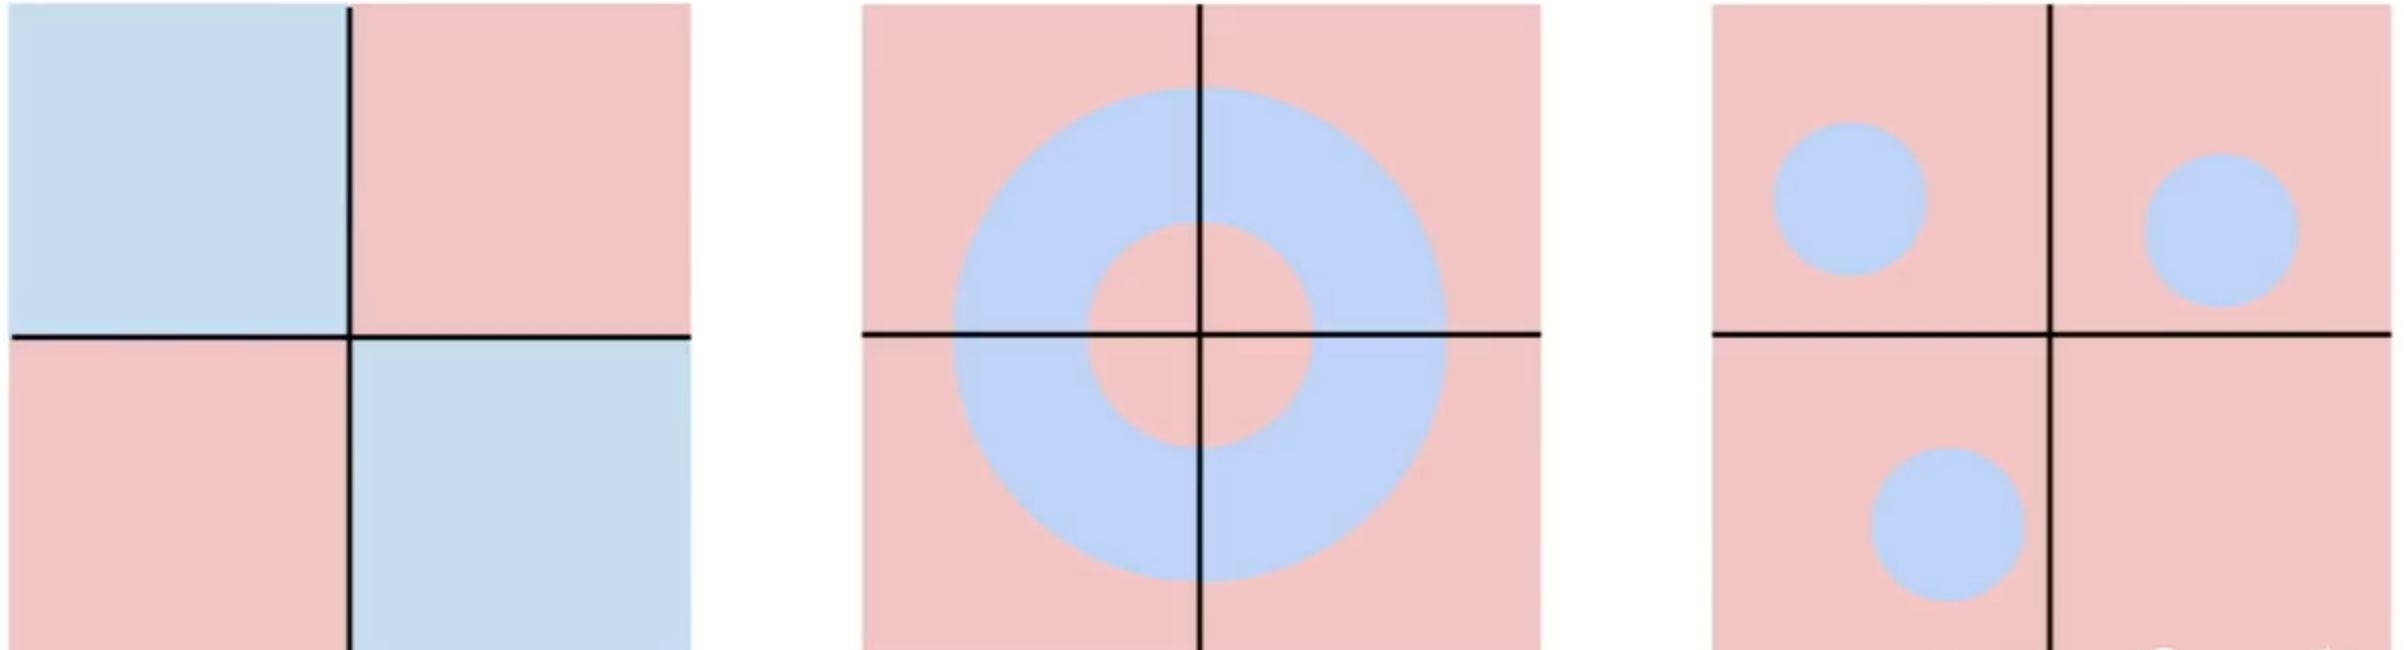

In [8]:
from IPython.display import Image
Image(filename='img/linear_classifier_fail.png') 
# Source: Stanford CS 239

#### What is Hing Loss? What does it measure?

Loss for $i^{th}$ training sample $ = L_i = \sum_{j\ne y_i} max(0, s_j - s_{y_i} + 1)$  
  
Loss of the dataset $ = L = \frac{1}{N} \sum_{i=1}^N L_i$

Loss is 0 if the score for the true class of sample is highest, else it is a sum of distances between score for true class and score for incorrect class. 

In [9]:
def svm_loss_i(x, y, W):
    scores = W.dot(x)
    margins = np.maximum(0, scores - scores[y] + 1)
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i

#### Given training data on tweets and their tweets, how would you predict the no. of re-tweets of a given tweet after 7 days after only observing 2 days worth of data?


#### How would you predict who someone may want to send a Snapchat or Gmat to?

#### How would you suggest to a franchise where to open a new store?

#### In a search engine, query auto complete solution

#### Given a database of all previous alumni donations to your university, how would you predict which recent alumni are more likely to donate?

#### You're Uber and you want to design a heatmap to recommend to drivers where to wait for passenger. How would you approach this?


#### How would you build a model to predict a March Madness bracket?

#### You want to run a regression to predict the probability of a flight delay, but there are flights with delays up to 12 hours that are really messing up your model. How will you address this?

#### 75. Regression Metrics:
* **Total Sum of Squares (TSS):** Measures the variation in the observed data  
$ \sum_{i=0}^{m} (y_i - \bar{y})^2$   

* __Residual Sum of Squares (RSS):__ Measures the variation in the modelling errors  
$ \sum_{i=0}^{m} (y_i - \hat{y_i})^2$  
* __Explained Sum of Squares (ESS):__  Measures variation in the modelled values  
$ \sum_{i=0}^{m} (\hat{y_i} - \bar{y})^2$   

* $R^2$ or co-efficient of variation   
$ (1- \frac{RSS}{TSS})$  
  
* Model performance: Mallow's Cp, AIC, BIC, Adjusted R^2


#### 76. Regularization:
* __Definition:__ Regularization is a technique used to reduce the complexity of the model, the objective is to increase bias and avoid overfitting the training sample. Regularization is usually done through addition of regularization term to the cost function of the machine learning model. 
* __LASSO aka L1 Regularization:__ Lasso shriks co-efficients towards 0. When the $\lambda$ is sufficiently large, the lasso method is likely to end up  shrinking some of the coefficients to 0. If there is a group of highly correlated variables, Lasso tends to select one from the group and ignore the rest. $$J(\theta) = \sum_{i = 1}^{m}{\left( y_i - \theta_0 - \sum_{j=1}^{n} \theta_j x_{i\space j}\right) ^2} + \lambda \sum_{j=1}^{n}{\mid \theta_j \mid}$$
* __Ridge aka L2 Regulization:__ Ridge regularization shriks co-efficient to 0. But, due to the nature of the penalty term, ridge penalization always yields models that have all the $n$ predictors. $$J(\theta) = \sum_{i = 1}^{m}{\left( y_i - \theta_0 - \sum_{j=1}^{n} \theta_j x_{i\space j}\right) ^2} + \lambda \sum_{j=1}^{n}{ \theta_j}^2$$
* __Elastic Net:__ L1 regularization is conservative with highly-correlated variables. Elastic net combines the cost function of both L1 and L2 to allow for more flexbility when compared to L1. 
$$J(\theta) = \sum_{i = 1}^{m}{\left( y_i - \theta_0 - \sum_{j=1}^{n} \theta_j x_{i\space j}\right) ^2} + \lambda_1 \sum_{j=1}^{n}{\mid \theta_j \mid} + \lambda_2 \sum_{j=1}^{n}{ \theta_j}^2$$
* __Max Norm:__
* __Dropout:__
* __Batch Normalization:__
* __Stochastic Depth:__


#### 77. Diagnostics:
* Discovering overfitting, underfitting through training and cv error


#### Softmax  Classifier
$ s_i = f(x_i: W)$   
$P(Y=k|X=x_i) = \frac{e^{s_k}}{\sum_j e^{s_k}}$  
Loss of ith sample = $L_i = -\log P(Y=k|X=x_i)$  = $-\log\frac{e^{s_k}}{\sum_j e^{s_k}}$   
Loss = $\frac{1}{N} \sum L_i + R $
min loss = 0, max loss = $\infty$

Difference between SVM, Softmax:
1. SVM: after the correct classification is higher than the rest, the loss = 0
2. Softmax: Will push the score of the correct classifier higher and higher

#### Approaches to Optimization
* Random Search: 
* Gradient Descent: 
    * __Calculating the gradient:__ $\frac{df(x)}{dx} = \lim_{h->0} \frac{f(x+h) + f(x)}{h}$
        * So, for each sample two values are required to be calculated $f(x)$ and $f(x + h)$. This computation is laborious.
        * Alternative, is to derive the expression for $f^\prime (x)$, and use it to update the weights. Hence, usualy a function whose first derivative is easily calculated is prefered in machine learning. 
    * __Gradient Update Sample Size:__ 
        * __Batch Gradient Descent:__ The weights are updated after calculating the gradient over the training sample. This can get computationationally expensive. 
        * __Stochastic Gradient Descent:__ Update the weights after computing loss for each sample
        * __Mini-batch gradient descent:__ Update the weights after computing loss for samples of sizes 2, 4, 8, ... (powers of 2)
    

#### Image Features
Approaches:
1. Raw Pixel Values
2. Two-stage: 
    1. Create feature representation of the image. This could also be a function transform or a co-ordinate transform
    2. Feed the features into a classfier
    * Example: computing hues, features with oriented edges, visual clusters
3. 